In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
%matplotlib inline

In [4]:
data = pd.read_csv('flightdata.csv')

In [5]:
data.head()

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,UNIQUE_CARRIER,TAIL_NUM,FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,...,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,ARR_DEL15,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,DISTANCE,Unnamed: 25
0,2016,1,1,1,5,DL,N836DN,1399,10397,ATL,...,2143,2102.0,-41.0,0.0,0.0,0.0,338.0,295.0,2182.0,NaN
1,2016,1,1,1,5,DL,N964DN,1476,11433,DTW,...,1435,1439.0,4.0,0.0,0.0,0.0,110.0,115.0,528.0,NaN
2,2016,1,1,1,5,DL,N813DN,1597,10397,ATL,...,1215,1142.0,-33.0,0.0,0.0,0.0,335.0,300.0,2182.0,NaN
3,2016,1,1,1,5,DL,N587NW,1768,14747,SEA,...,1335,1345.0,10.0,0.0,0.0,0.0,196.0,205.0,1399.0,NaN
4,2016,1,1,1,5,DL,N836DN,1823,14747,SEA,...,607,615.0,8.0,0.0,0.0,0.0,247.0,259.0,1927.0,NaN


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11231 entries, 0 to 11230
Data columns (total 26 columns):
YEAR                   11231 non-null int64
QUARTER                11231 non-null int64
MONTH                  11231 non-null int64
DAY_OF_MONTH           11231 non-null int64
DAY_OF_WEEK            11231 non-null int64
UNIQUE_CARRIER         11231 non-null object
TAIL_NUM               11231 non-null object
FL_NUM                 11231 non-null int64
ORIGIN_AIRPORT_ID      11231 non-null int64
ORIGIN                 11231 non-null object
DEST_AIRPORT_ID        11231 non-null int64
DEST                   11231 non-null object
CRS_DEP_TIME           11231 non-null int64
DEP_TIME               11124 non-null float64
DEP_DELAY              11124 non-null float64
DEP_DEL15              11124 non-null float64
CRS_ARR_TIME           11231 non-null int64
ARR_TIME               11116 non-null float64
ARR_DELAY              11043 non-null float64
ARR_DEL15              11043 non-null flo

In [7]:
data.isnull().values.any()

True

In [8]:
data.isnull().sum()

YEAR                       0
QUARTER                    0
MONTH                      0
DAY_OF_MONTH               0
DAY_OF_WEEK                0
UNIQUE_CARRIER             0
TAIL_NUM                   0
FL_NUM                     0
ORIGIN_AIRPORT_ID          0
ORIGIN                     0
DEST_AIRPORT_ID            0
DEST                       0
CRS_DEP_TIME               0
DEP_TIME                 107
DEP_DELAY                107
DEP_DEL15                107
CRS_ARR_TIME               0
ARR_TIME                 115
ARR_DELAY                188
ARR_DEL15                188
CANCELLED                  0
DIVERTED                   0
CRS_ELAPSED_TIME           0
ACTUAL_ELAPSED_TIME      188
DISTANCE                   0
Unnamed: 25            11231
dtype: int64

In [9]:
data.drop('Unnamed: 25', axis = 1, inplace = True)

In [10]:
data.isnull().sum()

YEAR                     0
QUARTER                  0
MONTH                    0
DAY_OF_MONTH             0
DAY_OF_WEEK              0
UNIQUE_CARRIER           0
TAIL_NUM                 0
FL_NUM                   0
ORIGIN_AIRPORT_ID        0
ORIGIN                   0
DEST_AIRPORT_ID          0
DEST                     0
CRS_DEP_TIME             0
DEP_TIME               107
DEP_DELAY              107
DEP_DEL15              107
CRS_ARR_TIME             0
ARR_TIME               115
ARR_DELAY              188
ARR_DEL15              188
CANCELLED                0
DIVERTED                 0
CRS_ELAPSED_TIME         0
ACTUAL_ELAPSED_TIME    188
DISTANCE                 0
dtype: int64

In [11]:
data = data[["MONTH", "DAY_OF_MONTH", "DAY_OF_WEEK", "ORIGIN", "DEST", "CRS_DEP_TIME", "ARR_DEL15"]]
data.isnull().sum()

MONTH             0
DAY_OF_MONTH      0
DAY_OF_WEEK       0
ORIGIN            0
DEST              0
CRS_DEP_TIME      0
ARR_DEL15       188
dtype: int64

In [12]:
data = data.fillna({'ARR_DEL15': 1})
data.iloc[177:185]

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,ORIGIN,DEST,CRS_DEP_TIME,ARR_DEL15
177,1,9,6,MSP,SEA,701,1.0
178,1,9,6,DTW,JFK,1527,0.0
179,1,10,7,MSP,DTW,1348,1.0
180,1,10,7,DTW,MSP,1540,0.0
181,1,10,7,JFK,ATL,1325,0.0
182,1,10,7,JFK,ATL,610,0.0
183,1,10,7,JFK,SEA,1615,0.0
184,1,10,7,MSP,DTW,625,1.0


In [13]:
data.isnull().sum()

MONTH           0
DAY_OF_MONTH    0
DAY_OF_WEEK     0
ORIGIN          0
DEST            0
CRS_DEP_TIME    0
ARR_DEL15       0
dtype: int64

In [14]:
data.head()

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,ORIGIN,DEST,CRS_DEP_TIME,ARR_DEL15
0,1,1,5,ATL,SEA,1905,0.0
1,1,1,5,DTW,MSP,1345,0.0
2,1,1,5,ATL,SEA,940,0.0
3,1,1,5,SEA,MSP,819,0.0
4,1,1,5,SEA,DTW,2300,0.0


In [15]:
import math

for index, row in data.iterrows():
    data.loc[index, 'CRS_DEP_TIME'] = math.floor(row['CRS_DEP_TIME'] / 100)
data.head()

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,ORIGIN,DEST,CRS_DEP_TIME,ARR_DEL15
0,1,1,5,ATL,SEA,19,0.0
1,1,1,5,DTW,MSP,13,0.0
2,1,1,5,ATL,SEA,9,0.0
3,1,1,5,SEA,MSP,8,0.0
4,1,1,5,SEA,DTW,23,0.0


In [16]:
data = pd.get_dummies(data, columns=['ORIGIN', 'DEST'])
data.head()

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,CRS_DEP_TIME,ARR_DEL15,ORIGIN_ATL,ORIGIN_DTW,ORIGIN_JFK,ORIGIN_MSP,ORIGIN_SEA,DEST_ATL,DEST_DTW,DEST_JFK,DEST_MSP,DEST_SEA
0,1,1,5,19,0.0,1,0,0,0,0,0,0,0,0,1
1,1,1,5,13,0.0,0,1,0,0,0,0,0,0,1,0
2,1,1,5,9,0.0,1,0,0,0,0,0,0,0,0,1
3,1,1,5,8,0.0,0,0,0,0,1,0,0,0,1,0
4,1,1,5,23,0.0,0,0,0,0,1,0,1,0,0,0


In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X = data.drop('ARR_DEL15', axis = 1)

In [19]:
y = data['ARR_DEL15']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [21]:
from sklearn.tree import DecisionTreeClassifier

In [22]:
dtc = DecisionTreeClassifier()

In [23]:
dtc.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [24]:
prediction = dtc.predict(X_test)

In [25]:
from sklearn.metrics import classification_report, confusion_matrix

In [26]:
print(confusion_matrix(y_test, prediction))

[[2507  399]
 [ 300  164]]


In [27]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

         0.0       0.89      0.86      0.88      2906
         1.0       0.29      0.35      0.32       464

   micro avg       0.79      0.79      0.79      3370
   macro avg       0.59      0.61      0.60      3370
weighted avg       0.81      0.79      0.80      3370



In [29]:
from sklearn.ensemble import RandomForestClassifier

In [30]:
rfc = RandomForestClassifier(n_estimators= 50)

In [31]:
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [32]:
rfc_prediction = rfc.predict(X_test)

In [33]:
print(confusion_matrix(y_test, rfc_prediction))

[[2843   63]
 [ 406   58]]


In [34]:
print(classification_report(y_test, rfc_prediction))

              precision    recall  f1-score   support

         0.0       0.88      0.98      0.92      2906
         1.0       0.48      0.12      0.20       464

   micro avg       0.86      0.86      0.86      3370
   macro avg       0.68      0.55      0.56      3370
weighted avg       0.82      0.86      0.82      3370



In [35]:
predicted = rfc.predict(X_test)
rfc.score(X_test, y_test)

0.8608308605341246

In [36]:
from sklearn.metrics import roc_auc_score
probabilities = rfc.predict_proba(X_test)

In [37]:
roc_auc_score(y_test, probabilities[:, 1])

0.6756947575764768

Text(0, 0.5, 'True Positive Rate')

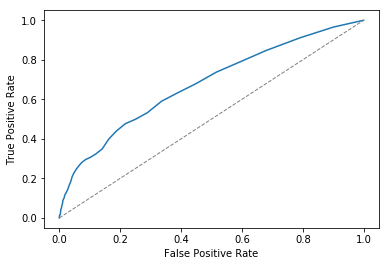

In [38]:
from sklearn.metrics import roc_curve

fpr, tpr, _ = roc_curve(y_test, probabilities[:, 1])
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], color='grey', lw=1, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

In [39]:
def delay_prediction(departure_date_time, origin, destination):
    from datetime import datetime

    try:
        departure_date_time_parsed = datetime.strptime(departure_date_time, '%d/%m/%Y %H:%M:%S')
    except ValueError as e:
        return 'Error parsing date/time - {}'.format(e)

    month = departure_date_time_parsed.month
    day = departure_date_time_parsed.day
    day_of_week = departure_date_time_parsed.isoweekday()
    hour = departure_date_time_parsed.hour

    origin = origin.upper()
    destination = destination.upper()

    input = [{'MONTH': month,
              'DAY': day,
              'DAY_OF_WEEK': day_of_week,
              'CRS_DEP_TIME': hour,
              'ORIGIN_ATL': 1 if origin == 'ATL' else 0,
              'ORIGIN_DTW': 1 if origin == 'DTW' else 0,
              'ORIGIN_JFK': 1 if origin == 'JFK' else 0,
              'ORIGIN_MSP': 1 if origin == 'MSP' else 0,
              'ORIGIN_SEA': 1 if origin == 'SEA' else 0,
              'DEST_ATL': 1 if destination == 'ATL' else 0,
              'DEST_DTW': 1 if destination == 'DTW' else 0,
              'DEST_JFK': 1 if destination == 'JFK' else 0,
              'DEST_MSP': 1 if destination == 'MSP' else 0,
              'DEST_SEA': 1 if destination == 'SEA' else 0 }]

    return  1 - rfc.predict_proba(pd.DataFrame(input))[0][0]

In [40]:
delay_prediction('1/10/2018 21:45:00', 'JFK', 'ATL')

0.16000000000000003

(0.0, 1.0)

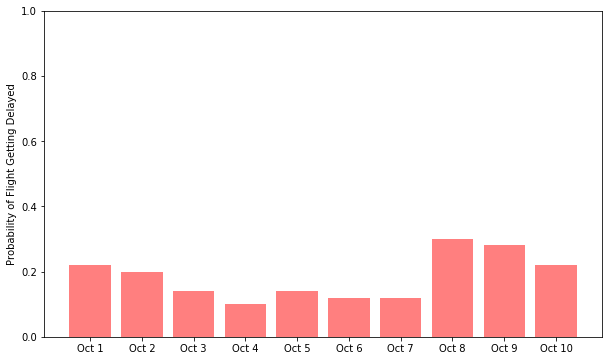

In [41]:
labels = ('Oct 1', 'Oct 2', 'Oct 3', 'Oct 4', 'Oct 5', 'Oct 6', 'Oct 7', 'Oct 8', 'Oct 9', 'Oct 10')
values = (delay_prediction('1/10/2018 21:45:00', 'JFK', 'MSP'),
          delay_prediction('2/10/2018 21:45:00', 'JFK', 'MSP'),
          delay_prediction('3/10/2018 21:45:00', 'JFK', 'MSP'),
          delay_prediction('4/10/2018 21:45:00', 'JFK', 'MSP'),
          delay_prediction('5/10/2018 21:45:00', 'JFK', 'MSP'),
          delay_prediction('6/10/2018 21:45:00', 'JFK', 'MSP'),
          delay_prediction('7/10/2018 21:45:00', 'JFK', 'MSP'),
          delay_prediction('8/10/2018 21:45:00', 'JFK', 'MSP'),
          delay_prediction('9/10/2018 21:45:00', 'JFK', 'MSP'),
          delay_prediction('10/10/2018 21:45:00', 'JFK', 'MSP'),
         )
alabels = np.arange(len(labels))
plt.figure(figsize = (10, 6))
plt.bar(alabels, values, align='center', alpha=0.5, color = 'red')
plt.xticks(alabels, labels)
plt.ylabel('Probability of Flight Getting Delayed')
plt.ylim((0.0, 1.0))